<a href="https://colab.research.google.com/github/j-buss/wi-dpi-analysis/blob/dev-analysis-foundation/analysis/yearly_comparison/Yearly_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

from google.cloud import bigquery
%matplotlib inline
plt.style.use('bmh')

In [0]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

In [0]:
project_id='wi-dpi-010'
dataset_name='Merged'

In [0]:
bq_client = bigquery.Client(project=project_id)

In [0]:
sql='''
  SELECT
    *
  FROM
    {}.{}
'''.format(dataset_name,'Educator_Role_Summary_by_Year')

In [0]:
df_educator_role_summary_by_year = pd.read_gbq(sql, project_id=project_id)

In [0]:
salaried_df = pd.DataFrame(df_educator_role_summary_by_year[df_educator_role_summary_by_year['Salary_Cnt'] != 0]\
          .groupby('Year').count().iloc[:,0])
salaried_df.columns = ["Salaried"]

In [0]:
non_salaried_df = pd.DataFrame(df_educator_role_summary_by_year[df_educator_role_summary_by_year['Salary_Cnt'] == 0]\
          .groupby('Year').count().iloc[:,0])
non_salaried_df.columns = ["Non Salaried"]

In [0]:
salary_count_df = pd.merge(salaried_df,
         non_salaried_df,
         right_index=True,
         left_index=True)

In [13]:
salary_count_df

,Salaried,Non Salaried
Year,,
2015,72760,61947
2016,71787,71713
2017,73055,71732
2018,73358,70122
2019,73755,71248


In [0]:
salary_count_df.reset_index(level=0, inplace=True)

In [26]:
salary_count_df.head()

,Year,Salaried,Non Salaried
0,2015,72760,61947
1,2016,71787,71713
2,2017,73055,71732
3,2018,73358,70122
4,2019,73755,71248


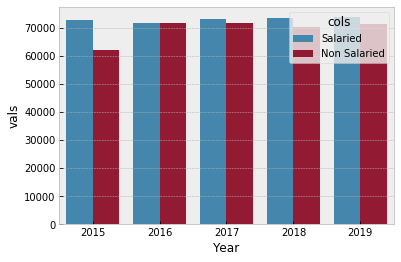

In [36]:
df = salary_count_df.melt('Year', var_name='cols',  value_name='vals')
g = sns.barplot(x="Year", y="vals", hue='cols', data=df)